<a href="https://colab.research.google.com/github/MarcellaC01/Diagnostics/blob/main/Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This script is a comprehensive workflow for machine learning with a car diagnostics dataset. It includes data loading, preprocessing to handle missing values, exploratory analysis with visualizations, and model training using linear and Ridge regression. The script concludes by evaluating model performance, interpreting model coefficients, and demonstrating how to save and reuse the model for predictions on new data.

In [ ]:
import pandas as pd

# Assuming the file name is OBD.csv
data = pd.read_csv('OBD.csv')


In [ ]:
import pandas as pd

# Assuming the file name is OBD.csv
data = pd.read_csv('OBD.csv')


In [ ]:
# Print the first five lines of the dataset
print(data.head())
print(data.head(10))


                       GPS Time  Device Time   Longitude   Latitude  \
0  Thu Nov 02 15:44:24 CDT 2017      44:25.1  -97.662474  30.483089   
1  Thu Nov 02 15:44:25 CDT 2017      44:26.1  -97.662476  30.483068   
2  Thu Nov 02 15:44:26 CDT 2017      44:27.1  -97.662478  30.483006   
3  Thu Nov 02 15:44:27 CDT 2017      44:28.1  -97.662546  30.482689   
4  Thu Nov 02 15:44:27 CDT 2017      44:29.1  -97.662546  30.482689   

   GPS Speed (Meters/second)   Horizontal Dilution of Precision   Altitude  \
0                   2.795157                                 93        250   
1                   0.000000                                 98        255   
2                   0.000000                                105        247   
3                   0.000000                                101        225   
4                   0.000000                                101        225   

    Bearing      G(x)      G(y)       G(z)   G(calibrated)  \
0     211.6  0.350434  9.163701  -2.947818

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)


GPS Time                             0
 Device Time                         0
 Longitude                           0
 Latitude                            0
GPS Speed (Meters/second)            0
 Horizontal Dilution of Precision    0
 Altitude                            0
 Bearing                             0
 G(x)                                0
 G(y)                                0
 G(z)                                0
 G(calibrated)                       0
Engine Coolant Temperature(°C)       0
Engine RPM(rpm)                      0
Intake Air Temperature(°C)           0
Engine Load(%)                       0
Mass Air Flow Rate(g/s)              0
Throttle Position(Manifold)(%)       0
dtype: int64


/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


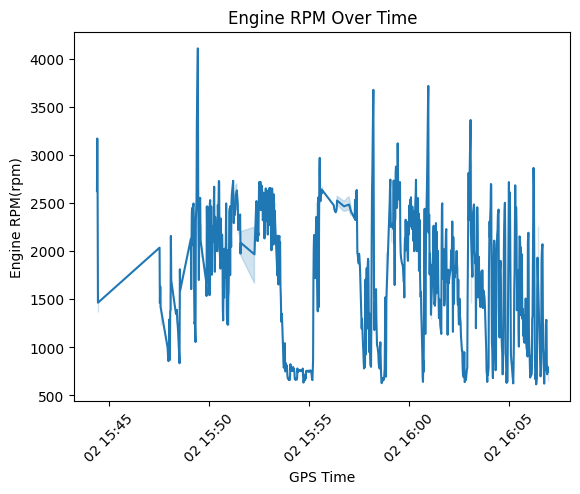

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'GPS Time' to datetime format
data['GPS Time'] = pd.to_datetime(data['GPS Time'], errors='coerce')

sns.lineplot(x='GPS Time', y='Engine RPM(rpm)', data=data)
plt.xticks(rotation=45)
plt.title('Engine RPM Over Time')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting features and target variable
X = data[['Engine RPM(rpm)', 'GPS Speed (Meters/second)']]
y = data['Engine Load(%)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the modelx
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 315.11337552480677


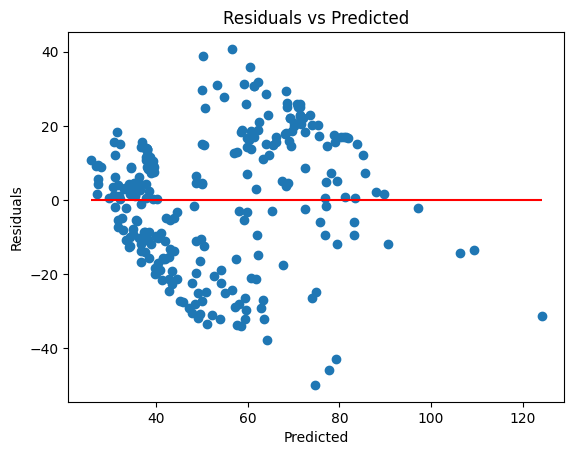

R-squared: 0.535424235224896
Polynomial Regression MSE: 256.60183031623336
Polynomial Regression R-squared: 0.6216885704603456
Coefficients: [ 0.03028877 -0.92255295]
Intercept: 15.353048544896815
Prediction for new data: [105.32082714]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import joblib

# Model diagnostics: Residuals plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

# Check R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# If model is not satisfactory, consider improving it
# For example, using polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the new, polynomial features into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train a Ridge regression model
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_poly, y_train)

# Predict and evaluate the new model
y_pred_poly = ridge_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression MSE: {mse_poly}')
print(f'Polynomial Regression R-squared: {r2_poly}')

# Model interpretation: Examining coefficients
# For linear regression (not polynomial or ridge)
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Save the model
joblib.dump(ridge_model, 'ridge_model.pkl')

# To load and use the model later
loaded_model = joblib.load('ridge_model.pkl')
new_data = [[3000, 15]]  # example new data point
new_data_poly = poly.transform(new_data)
prediction = loaded_model.predict(new_data_poly)
print(f'Prediction for new data: {prediction}')
